Подготовка данных для обработки

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 6) for n in range(1, 6)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

Выборка для диаметра проволоки 0,08 мм, шаг витка 0,2..0,5 мм

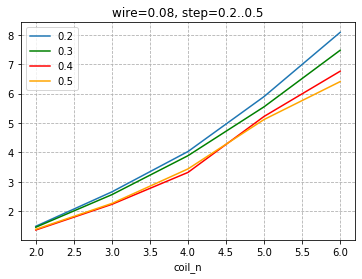

In [8]:
wire_dia = 0.08
rects008 = rects.loc[(rects['wire_dia (mm)'] == wire_dia)]

step = 0.2
rects008_step_02 = rects008.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
ax = rects008_step_02.plot(x='coil_n', y='L, uH', title=f'wire={wire_dia}, step=0.2..0.5', label=step)

step = 0.3
rects08_step_03 = rects008.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_step_03.plot(x='coil_n', y='L, uH', ax=ax, label=step, color='green')

step = 0.4
rects08_step_04 = rects008.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_step_04.plot(x='coil_n', y='L, uH', ax=ax, label=step, color='red')

step = 0.5
rects08_step_05 = rects008.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects08_step_05.plot(x='coil_n', y='L, uH', ax=ax, label=step, color='orange')

ax.grid(linestyle='--')


Выборка для диаметра проволоки 0,1 мм, шаг витка 0,2..0,5 мм

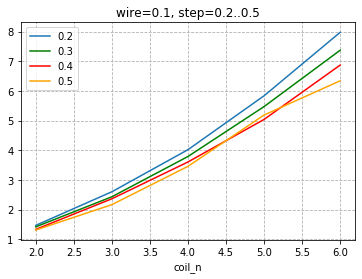

In [9]:
wire_dia = 0.1
rects01 = rects.loc[(rects['wire_dia (mm)'] == wire_dia)]

step = 0.2
rects01_step_02 = rects01.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
ax = rects01_step_02.plot(x='coil_n', y='L, uH', title=f'wire={wire_dia}, step=0.2..0.5', label=step, grid=True)

step = 0.3
rects01_step_03 = rects01.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects01_step_03.plot(x='coil_n', y='L, uH', ax=ax, label=step, color='green')

step = 0.4
rects01_step_04 = rects01.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects01_step_04.plot(x='coil_n', y='L, uH', ax=ax, label=step, color='red')

step = 0.5
rects01_step_05 = rects01.loc[(rects['step (mm)'] == step)][['coil_n', 'L, uH']]
rects01_step_05.plot(x='coil_n', y='L, uH', ax=ax, label=step, color='orange')

ax.grid(linestyle='--')

Выборка для диаметра проволоки 0,08 мм, количество витков 2..6

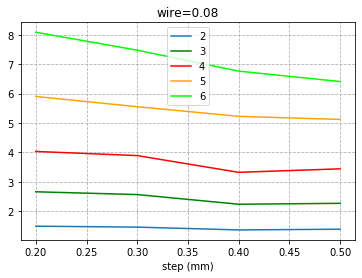

In [10]:
coil_n = 2
rects08_coil_n_2 = rects008.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
ax = rects08_coil_n_2.plot(x='step (mm)', y='L, uH', label=coil_n, title='wire=0.08')

coil_n = 3
rects08_coil_n_3 = rects008.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects08_coil_n_3.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='green')

coil_n = 4
rects08_coil_n_4 = rects008.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects08_coil_n_4.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='red')

coil_n = 5
rects08_coil_n_5 = rects008.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects08_coil_n_5.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='orange')

coil_n = 6
rects08_coil_n_6 = rects008.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects08_coil_n_6.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='lime')

ax.grid(linestyle='--')

Выборка для диаметра проволоки 0,1 мм, количество витков 2..6

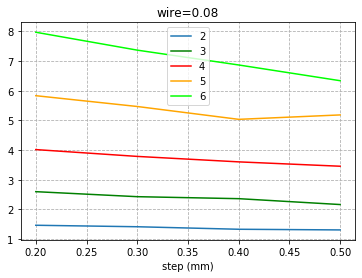

In [11]:
coil_n = 2
rects01_coil_n_2 = rects01.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
ax = rects01_coil_n_2.plot(x='step (mm)', y='L, uH', label=coil_n, title='wire=0.08')

coil_n = 3
rects01_coil_n_3 = rects01.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects01_coil_n_3.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='green')

coil_n = 4
rects01_coil_n_4 = rects01.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects01_coil_n_4.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='red')

coil_n = 5
rects01_coil_n_5 = rects01.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects01_coil_n_5.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='orange')

coil_n = 6
rects01_coil_n_6 = rects01.loc[(rects['coil_n'] == coil_n)][['step (mm)', 'L, uH']]
rects01_coil_n_6.plot(x='step (mm)', y='L, uH', ax=ax, label=coil_n, color='lime')

ax.grid(linestyle='--')